# Navigation dans les données de Pix

In [1]:
import logging
logger = logging.getLogger()
logger.setLevel(logging.INFO)

from import_data import import_data, make_df, make_df_skills

data = import_data()
df = make_df(data)
df.head()

INFO:root:Loaded skills with ['id', 'name', 'pixValue', 'competenceId']
INFO:root:Loaded usersData with ['userId', 'knowledgeElements']
INFO:root:Loaded challenges with ['id', 'competenceId', 'status', 'type', 'skills']


,userId,skillId,status,source,createdAt,outcome
0,8b302831192628f1b181efaa948d941a,0f62228041f4c7422886ae29cca44653240f42fe802956...,validated,inferred,2019-07-24T09:43:28.725Z,1.0
1,8b302831192628f1b181efaa948d941a,ab48a9648bb9a746a4e156262f9eba1afe7faa0804b139...,validated,direct,2019-07-24T09:43:28.725Z,1.0
2,8b302831192628f1b181efaa948d941a,3a61f48b56516449d43fff3e011519dfd6fcbe09acc096...,validated,inferred,2019-07-24T09:45:23.642Z,1.0
3,8b302831192628f1b181efaa948d941a,dd486fefe10dc076952b933f30cdd5f743251894eecb4b...,validated,direct,2019-07-24T09:45:23.642Z,1.0
4,8b302831192628f1b181efaa948d941a,e9d368b8202504b3e9d46098bbfd357cb05661eb015ffa...,validated,inferred,2019-07-24T09:45:23.642Z,1.0


Décrire le contenu d'une variable.

In [2]:
df.status.value_counts()

validated      995480
invalidated    546528
reset           13122
Name: status, dtype: int64

## Distribution des taux de succès

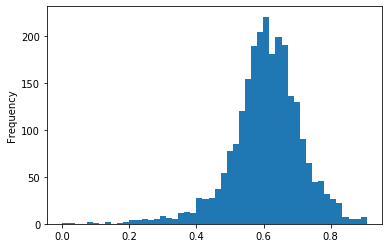

In [3]:
success_rate = df.query('source == "direct"').groupby('userId')['outcome'].mean()
success_rate.plot.hist(bins=50)

In [4]:
success_rate.mean()

0.6078896432195449

Les utilisateurs réussissent 61 % du temps.

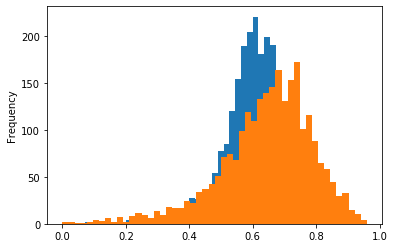

In [5]:
df.query('source == "direct"').groupby('userId')['outcome'].mean().plot.hist(bins=50)
df.groupby('userId')['outcome'].mean().plot.hist(bins=50)  # En comptant les acquis inférés 

## Se limiter à une compétence

In [6]:
skills = make_df_skills(data)
skills.head()

,id,name,pixValue,competenceId,tube,level,maxLevel,nb_inval,nb_val
317,55711e040cd06d74aa5e9f88abd661ecd4db115042143a...,@addition1,1.600000,4b57d627d9360d14d6e4e82cadcc3ad158acd591851680...,addition,1,6,6,1
289,d9b23f4d3ddc26a132caf417330df05f738403e3694ffa...,@addition2,1.142857,4b57d627d9360d14d6e4e82cadcc3ad158acd591851680...,addition,2,6,5,2
301,5134fdb9df3163305f6b2de420c10c748b9b4f4832603d...,@addition3,0.800000,4b57d627d9360d14d6e4e82cadcc3ad158acd591851680...,addition,3,6,4,3
306,a217ab874dc194b384393507d7c88f755b850f81b70ed2...,@addition4,0.727273,4b57d627d9360d14d6e4e82cadcc3ad158acd591851680...,addition,4,6,3,4
321,9347594417b239234329f20be5a8d2bb56ab68afbf2539...,@addition5,1.000000,4b57d627d9360d14d6e4e82cadcc3ad158acd591851680...,addition,5,6,2,5


In [7]:
onecomp = skills['competenceId'][0]
interesting = skills.query('competenceId == @onecomp')['id']

In [8]:
subset = df.query('skillId in @interesting')

In [9]:
from collections import defaultdict
import numpy as np

assessments = defaultdict(str)
for userId, outcome in zip(subset['userId'], subset['outcome']):
    if not np.isnan(outcome):
        assessments[userId] += str(int(outcome))

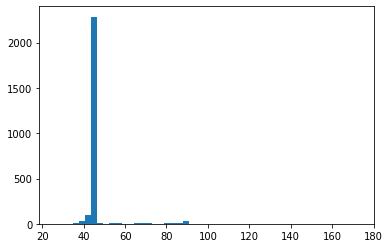

In [10]:
%matplotlib inline
import matplotlib.pyplot as plt

plt.hist([len(pattern) for _, pattern in assessments.items()], bins=50)
plt.show()

In [11]:
np.mean([len(pattern) for _, pattern in assessments.items()])

44.98

In [12]:
from collections import Counter
Counter([len(pattern) for _, pattern in assessments.items()])[44]

2276

Il y a 2276 utilisateurs qui ont donné 44 réponses pour cette compétence.